In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [206]:
sns.color_palette("husl", 8)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

## Import Data

In [207]:
def import_dataset(path, symbol):
    data = pd.read_csv(path + symbol + '.csv', parse_dates=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')
    return data

## Visualize Dataset

In [208]:
def plot_feature(data, feature):
    plt.figure(figsize=(16, 8))
    line_plot = sns.lineplot(x=data.index, y=data[feature])
    line_plot.set_title(f'{feature}', fontdict={'fontsize':16}, pad=16)

    plt.show()

In [209]:
def plot_correlations(data):
    plt.figure(figsize=(16, 8))
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=16)

    plt.show()

In [210]:
def compute_moving_average(data, ma_interval):
    data[ma_interval] = data.rolling(ma_interval).mean()
    return data

In [211]:
def plot_moving_average(data, ma_interval):
    data = compute_moving_average(data, ma_interval)
    plt.figure(figsize=(16, 8))
    sns.lineplot(x=data.index, y=data['Close'])

    plt.show()

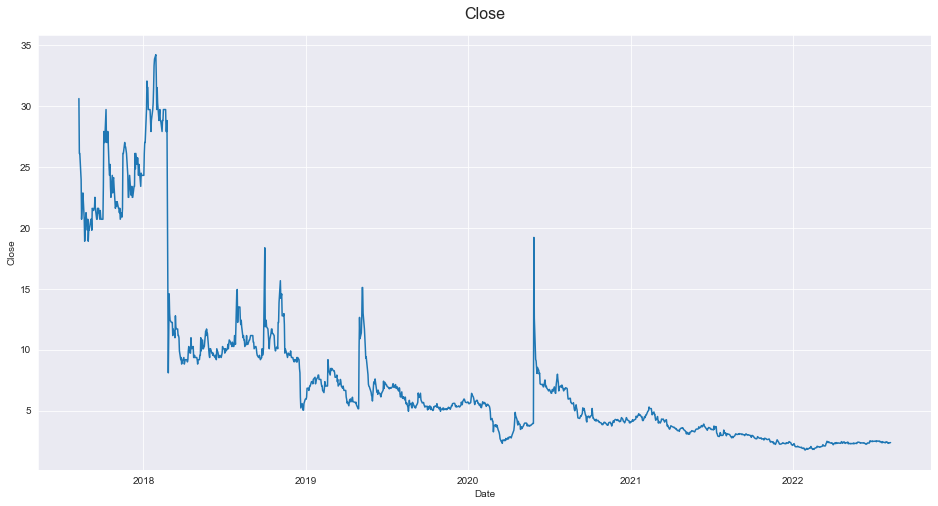

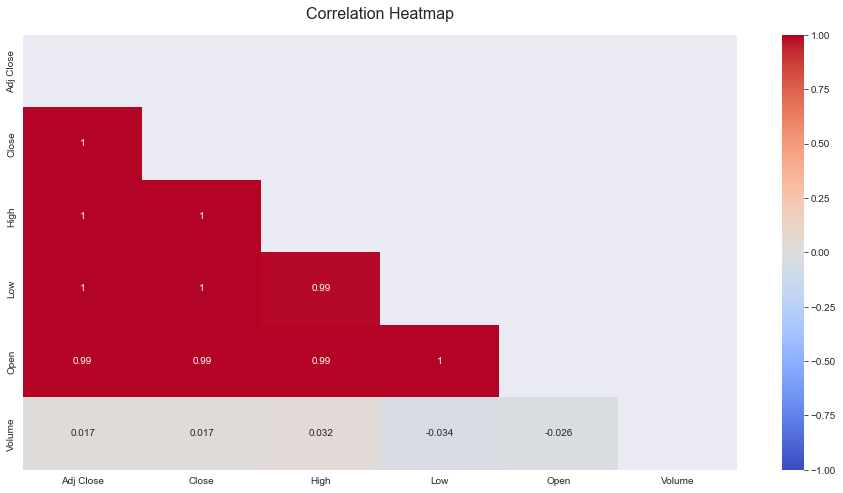

ValueError: Expected a 1D array, got an array with shape (1258, 6)

In [212]:
def main():
    data = import_dataset('../data/historical/', 'ABIO')
    plot_feature(data, 'Close')
    plot_correlations(data)
    plot_moving_average(data, 10)
if __name__ == '__main__':
    main()